#UCI ML Drug Review dataset
link: https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018

#Objetivos:
1. Visualización de datos: ¿Qué tipo de fármacos existen? ¿Qué tipo de afecciones tienen estos pacientes?

2. Análisis de sentimientos: ¿Qué elementos de la información contenida en la columna ‘review’ la hacen más útil para otros pacientes? ¿Qué pacientes tienden a tener más revisiones negativas? ¿Puede determinar si una review es positiva o negativa?

3. Clasificación: ¿Puede predecir la columna ‘condition’ en base a la columna ‘review’?


#Setup 

In [ ]:
# álgebra lineal
import numpy as np  

# manejo de data frames y archivos 
import pandas as pd 

#gráficas y visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns 

#Obtención de los datos

In [ ]:
# instalación de la API oficial de  https://www.kaggle.com
!pip install kaggle 

In [ ]:
#Carga del API token
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arturogranados","key":"55059be5f146d7c79b57678f7c5d7d6e"}'}

In [ ]:
#directorio actual 
!pwd 

/content


In [ ]:
#Importando el modulo operation sistem
import os 

#configuracion del directorio 
os.environ['KAGGLE_CONFIG_DIR'] = '/content' 

In [ ]:
#descarga del dataset
!kaggle datasets download -d jessicali9530/kuc-hackathon-winter-2018 

 42% 17.0M/40.7M [00:00<00:00, 80.4MB/s]
100% 40.7M/40.7M [00:00<00:00, 128MB/s] 


#Obteniendo los archivos csv del archivo .zip

In [ ]:
from zipfile import ZipFile 

#función para extraer los archivos
def open_zipfile(file_name): 
  with ZipFile(file_name, 'r') as zip:
   
    zip.printdir() # .printdir muestra todos los elementos dentro del archivo zip
    zip.extractall()  # .extractall estrae todos los elementos 
 
    

In [ ]:
#extracción de los archivos csv
open_zipfile("kuc-hackathon-winter-2018.zip") 

File Name                                             Modified             Size
drugsComTest_raw.csv                           2019-10-11 19:26:30     27637580
drugsComTrain_raw.csv                          2019-10-11 19:26:34     82990470


#Creación de los Datasets

In [ ]:
#.read_csv() lee archivos comma-separated values (csv) como DataFrames.

testset = pd.read_csv('drugsComTest_raw.csv') 
trainset = pd.read_csv('drugsComTrain_raw.csv')

#EDA

##Datos generales del dataset

Analizamos la estructura del dataset con el fin de conocer el tipo de datos con los que estamos trabajando, nos interesa conocer características como la estructura del dataset, el número de filas y columnas, el tipo de datos en cada columna.

In [ ]:
trainset.head(10) # .head() retorna las primeras n filas

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
list(trainset) == list(testset) # list(trainset) y list(testset) retornan una lista con las columnas.

True

In [ ]:
trainset.shape # .shape retorna una tupla con la forma del array 

(161297, 7)

In [ ]:
trainset.shape[0], testset.shape[0], trainset.shape[0]/testset.shape[0] #al agregar [n] al comando .shape estamos accediendo al n-ésimo elemento de la tupla shape, 
                                                                        #en este caso sería la longitud del dataset

(161297, 53766, 2.999981400885318)

In [ ]:
trainset.info() #.info() retorna un resumen de la información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


##Analisis de la columnas

En esta parte del notebook nos enfocaremos en analizar la información contenida en cada columna, con el fin de entender cuáles de ellas contienen información importante para nuestro propósitos. En este caso específico los objetivos 2 y 3 están enmarcados en las columnas review, rating y condition, así que ya sabemos que en estas columnas tendremos que prestar principal atención. Por otra parte, el objetivo uno nos pide analizar columnas como condition y drugname.

##uniqueID

La columna uniqueID proporciona un número de identificación a cada paciente, este número es único por paciente.

Como podemos ver en la primera celda el dataset tiene 161297 filas y el número de valores únicos en la columna uniqueID es de 161297, lo que nos indica que todos los datos pertenecen a personas distintas.


In [ ]:
trainset.shape[0]

161297

In [ ]:
trainset.uniqueID.value_counts()

206461    1
115685    1
78842     1
151214    1
225627    1
         ..
140483    1
29358     1
65306     1
26066     1
215220    1
Name: uniqueID, Length: 161297, dtype: int64

##drugName


La columna drugname, contiene el nombre del fármaco que utilizó el paciente. Aquí tenemos que prestar principal atención en el tipo de fármacos que los pacientes utilizan.


In [ ]:
trainset.drugName.value_counts() # .value_counts() devuelve una Serie que contiene recuentos de filas únicas en el DataFrame

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

In [ ]:
#Función barplot retorna una gráfica de barras


def barplot(dataset, column, n, title):  #Parametros:
                                         #dataset, indica el dataset de donde sacara la informacion
                                         #column, indica la columna a graficar
                                         #n, especifica cuántos elementos queremos visualizar
                                         #title, especifica el titulo
  column_dictionary = dict(dataset[column].value_counts()) #creamos un diccionario con dict() que contenga los valores(values) de la columna y su frecuencia(keys) extraídas con .value_counts()
  frequency_values = list(column_dictionary.values()) #extraemos los valores del diccionario con .values() y los almacenamos en una lista con list()
  column_values = list(column_dictionary.keys()) #extraemos las frecuencias con .keys() y las guardamos en una lista con list()
  plt.figure(figsize=(15,8)) #establecemos el tamaño de la gráfica con figsize=(largo, alto) para que todas sean iguales
  sns.set(font_scale = 2, style = 'darkgrid') #establecemos el estilo(style) de la gráfica y el tamaño de las letras(font_scale)
 
  bar_plot = sns.barplot(x = column_values[0:n], y = frequency_values[0:n]) # creamos la gráfica de barras con sns.barplot y asignamos los valores de los ejes x, y
                                                                            #guardamos la gráfica en bar_plot para asignarle algunos atributos
  bar_plot.set_title(title, fontweight="bold") # le asignamos un título con .set_title(),
  bar_plot.set_ylabel("Frecuencia")#asignamos una etiqueta sobre el eje y con .set_ylabel()
  bar_plot.set_xlabel("valores de la columna {} ".format(column)) #asignamos una etiqueta sobre el eje x con .set_ylabel()
  plt.setp(bar_plot.get_xticklabels(), rotation=90) #por último rotamos los valores del eje x para que no se empalmen 


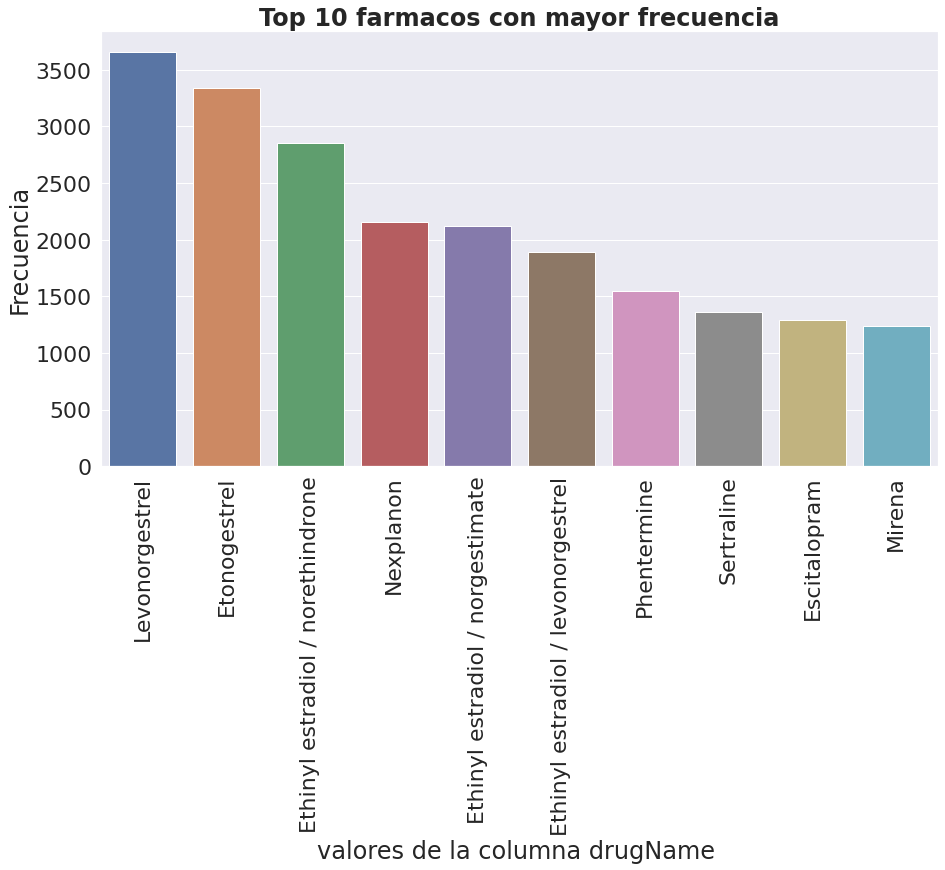

In [ ]:
#Uso de la funcion barplot para var los farmacos mas frecuentes

barplot(trainset, 'drugName', 10,'Top 10 farmacos con mayor frecuencia' )

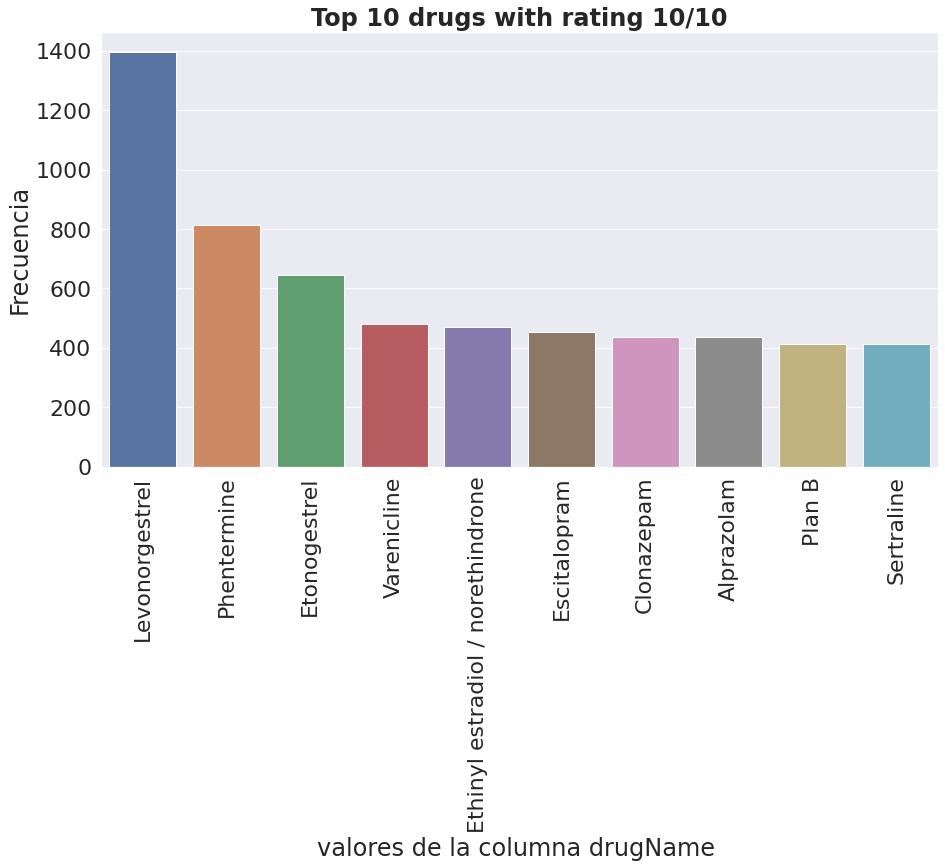

In [ ]:
#Uso de la funcion barplot para a

barplot(trainset.loc[trainset.rating == 10], 'drugName', 10,'Top 10 drugs with rating 10/10')

In [ ]:
trainset[trainset.drugName == 'Levonorgestrel'].head(10) 

,uniqueID,drugName,condition,review,rating,date,usefulCount
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
83,131041,Levonorgestrel,Birth Control,"""I had the Mirena put in almost a year ago. In...",1,18-Jan-10,10
113,166891,Levonorgestrel,Birth Control,"""My time with skyla has been an absolute breez...",10,14-Jul-16,1
139,130867,Levonorgestrel,Birth Control,"""I&#039;m 27 w/ two kids. After my second chil...",2,26-Jun-11,2
144,165523,Levonorgestrel,Birth Control,"""Had the Liletta inserted in November. The pro...",3,24-May-17,4
171,130582,Levonorgestrel,Birth Control,"""I am 25 yrs old, no kids and have never been ...",10,7-May-12,1
233,167487,Levonorgestrel,Emergency Contraception,"""Let me just tell you, to those reading these ...",9,26-Feb-16,11
291,142693,Levonorgestrel,Birth Control,"""I&#039;ve been on birth control for a while n...",4,9-Aug-17,3
327,129501,Levonorgestrel,Emergency Contraception,"""Ok girls if your reading this it&#039;s becau...",10,5-Aug-15,19
355,130586,Levonorgestrel,Birth Control,"""I have had my Mirena for three months now. In...",10,1-May-12,2


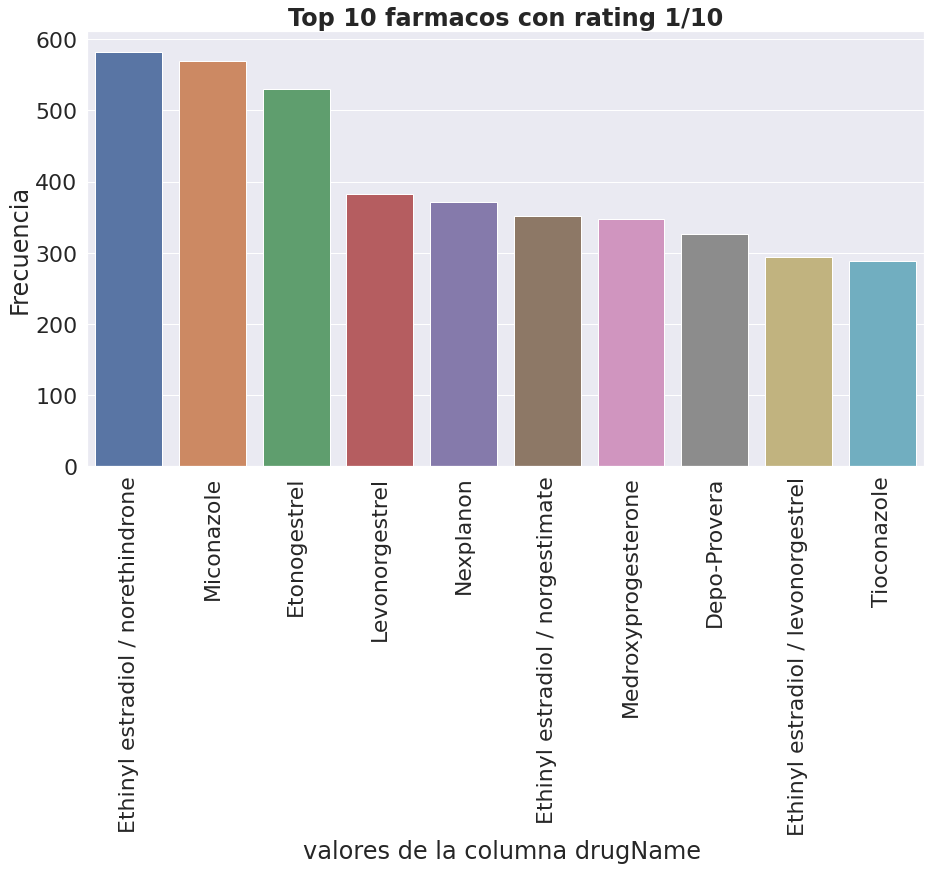

In [ ]:
barplot(trainset.loc[trainset.rating == 1], 'drugName', 10,'Top 10 farmacos con rating 1/10')

##Condition

La columna condition nos indica la razón por la cual los pacientes han consumido los fármacos.
Esta es una de las columnas en la que hay que prestar más atención ya que la usaremos como output para resolver el objetivo 3.


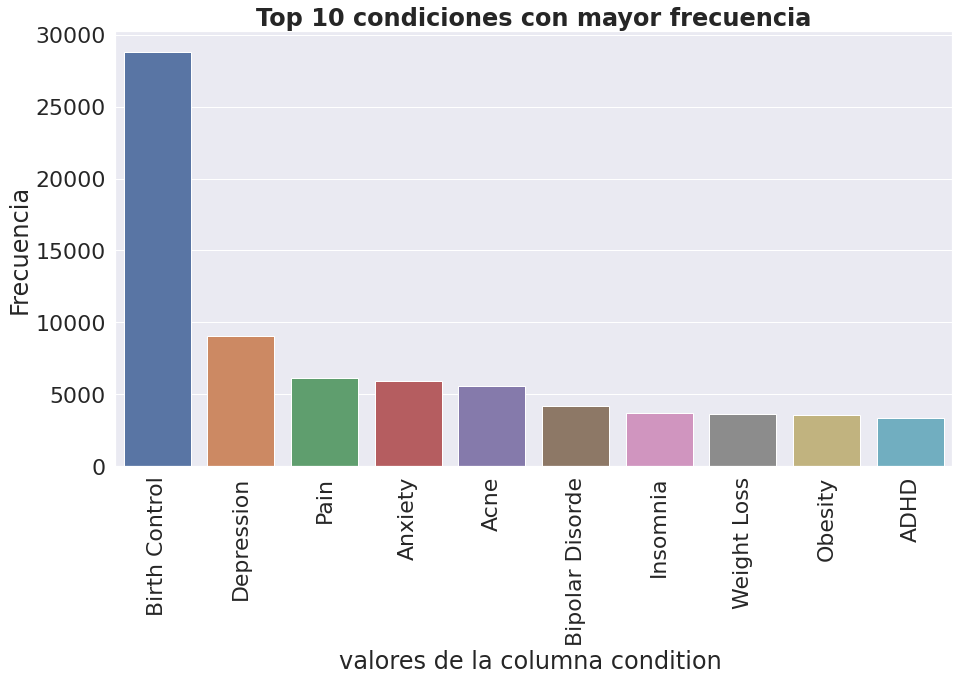

In [ ]:
#Top 10 condiciones con mayor frecuencia

barplot(trainset, 'condition', 10, 'Top 10 condiciones con mayor frecuencia')

In [ ]:
trainset.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

Como se puede ver en la celda anterior hay condiciones que solo aparecen una vez, esto nos muestra un problema que tendremos al resolver el objetivo 3 ya que un modelo de ml o deep learning no podrán predecir estas condiciones con pocas frecuencias, para esto es mejor será enfocarnos en las condiciones que aparecen con más frecuencia así que en el objetivo 3 solo me enfocaré en hacer un modelo capaz de predecir condiciones con más 3000 apariciones en el dataset.

In [ ]:
#Dataframe con condiciones y su frecuencia
count_df = trainset[['condition','review']].groupby('condition').aggregate({'review':'count'}).reset_index().sort_values('review',ascending=False)

In [ ]:
#Visualizaación de la frecuencia de las condiciones
count_df.head(5)

,condition,review
165,Birth Control,28788
262,Depression,9069
594,Pain,6145
125,Anxiety,5904
80,Acne,5588


In [ ]:
#Selección de las condiciones más comunes
target_conditions = count_df[count_df['review']>3000]['condition'].values

In [ ]:
#Visualización de las condiciones más comunes
target_conditions

array(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
       'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD'],
      dtype=object)

##Review

La columna review tal vez sea en la que más atención enfoquemos ya que será el input de dos de los objetivos. Para analizar esta columna nos enfocaremos en checar características como la longitud de los reviews, identificar caracteres que no aporten información útil a los reviews para posteriormente limpiarlos y tratar de encontrar patrones en los reviews que podamos usar en la construcción de los modelos.

In [ ]:
trainset.review[1] 

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

##Analysing n-grams 

In [ ]:
trainset = pd.read_csv('drugsComTrain_raw.csv')

In [ ]:
def labelling(rating):
    if rating < 6 :
        return 'Negativo'   
    else:
        return 'Positivo'   

In [ ]:
trainset['sentiment'] = trainset['rating'].apply(labelling) 

In [ ]:
review_positivo = trainset[trainset['sentiment'] == 'Positivo'] #reviews positivos 
review_negativo = trainset[trainset['sentiment'] == 'Negativo'] #reviews neutros

In [ ]:
#importando NLTK(Natural Language Toolkit)
import nltk 
from nltk.corpus import stopwords
from collections import defaultdict

nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def generate_ngrams(text, n_gram=1, stop=True):
   
    stop = set(stopwords.words("english")) if stop else {}

    token = [
        token for token in text.lower().split(" ") if token != "" if token not in stop
    ]
    z = zip(*[token[i:] for i in range(n_gram)])
    ngrams = [" ".join(ngram) for ngram in z]

    return ngrams

In [ ]:
######### función para graficar los n gramas #########
def plot_ngrams(n_gram): 

  #definimos un diccinario para cada sentimiento
  review_positivo_ngrams = defaultdict(int) 
  review_negativo_ngrams = defaultdict(int)

# For loop para review_poditivo 
  for text in trainset[trainset['sentiment'] == 'Positivo'].review:
      for word in generate_ngrams(text, n_gram):
          review_positivo_ngrams[word] += 1

# For loop para review_negativo 
  for text in trainset[trainset['sentiment'] == 'Negativo'].review:
      for word in generate_ngrams(text, n_gram):
          review_negativo_ngrams[word] += 1

#combirtiendo los diccionarios en dataframes

#Dataframe de reviews poditivos
  dataframe_ngram_positivo = pd.DataFrame(
      sorted(review_positivo_ngrams.items(), key=lambda x: x[1])[::-1]
  ) #sorted acomoda los elemntos de meyor a menor


#Dataframe de reviews negativos
  dataframe_ngram_negativo = pd.DataFrame(
      sorted(review_negativo_ngrams.items(), key=lambda x: x[1])[::-1]
  )

#gráfica

  fig = plt.figure(figsize=(24,15)) #tamaño

  ax= [None for _ in range(2)] 
#tamaño de y posición de cada subgráfica
  ax[0] = plt.subplot2grid((3,4), (0,0), colspan = 2)
  ax[1] = plt.subplot2grid((3,4), (1,0), colspan = 2)
#subgráfica
  sns.barplot(x= dataframe_ngram_positivo[1][:10], y= dataframe_ngram_positivo[0][:10], data= dataframe_ngram_positivo, orient='h', palette='hls', ax=ax[0])
  sns.barplot(x= dataframe_ngram_negativo[1][:10], y= dataframe_ngram_negativo[0][:10], data= dataframe_ngram_negativo, orient='h', palette='hls', ax=ax[1]) 

#asignamos un titulo a cada subgráfica
  ax[0].set_title('Sentimiento positivo')
  ax[1].set_title('Sentimiento negativo') 
  plt.show()

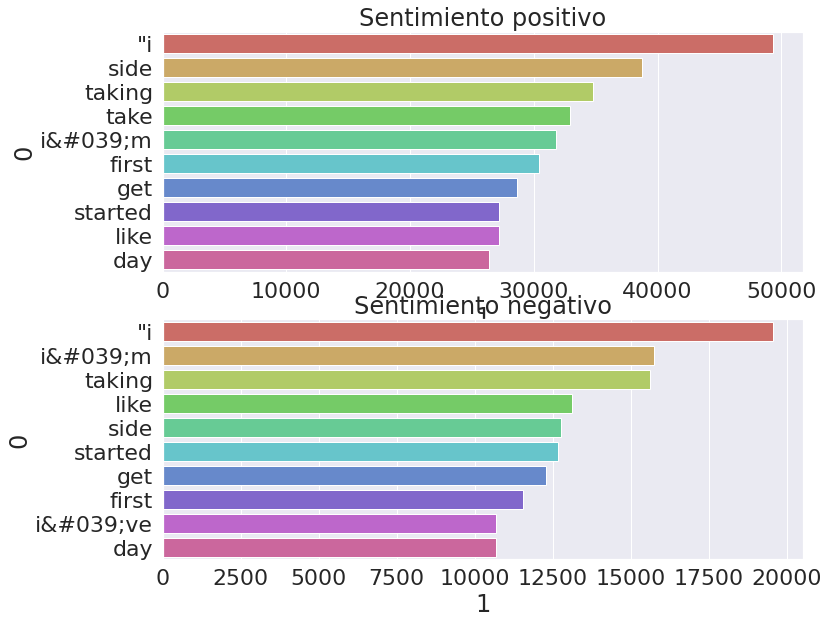

In [ ]:
plot_ngrams(1) #unigramas

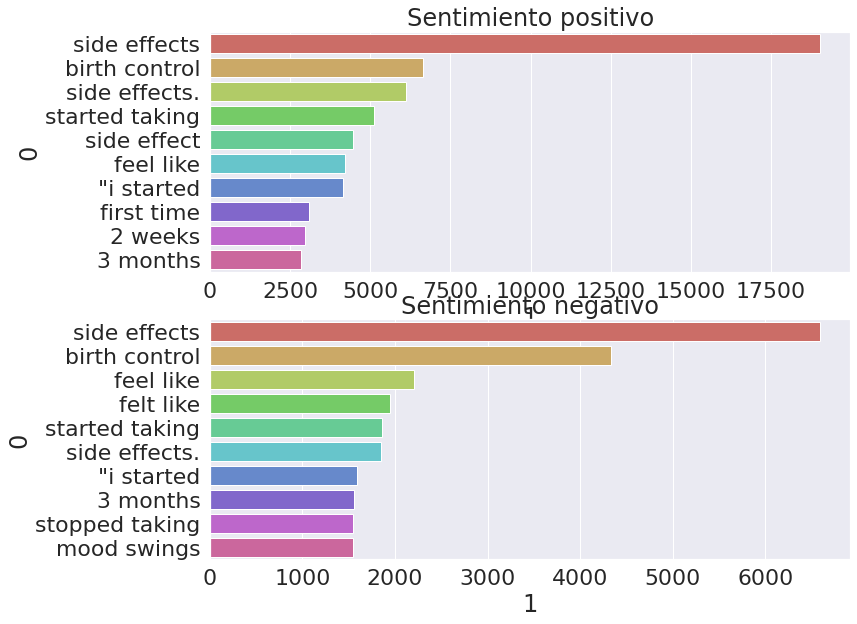

In [ ]:
plot_ngrams(2) #bigramas

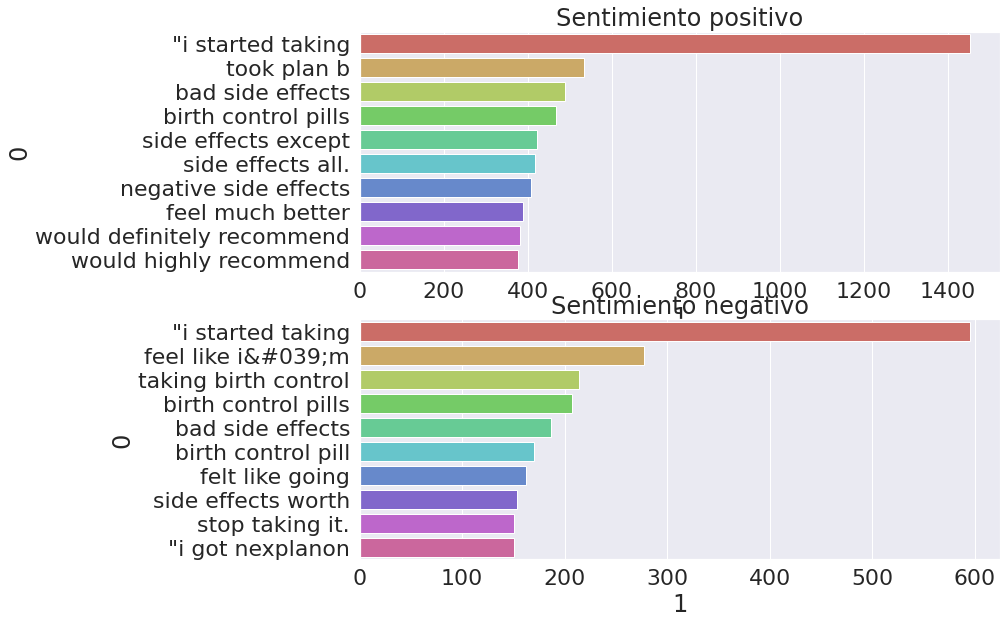

In [ ]:
plot_ngrams(3)#trigramas

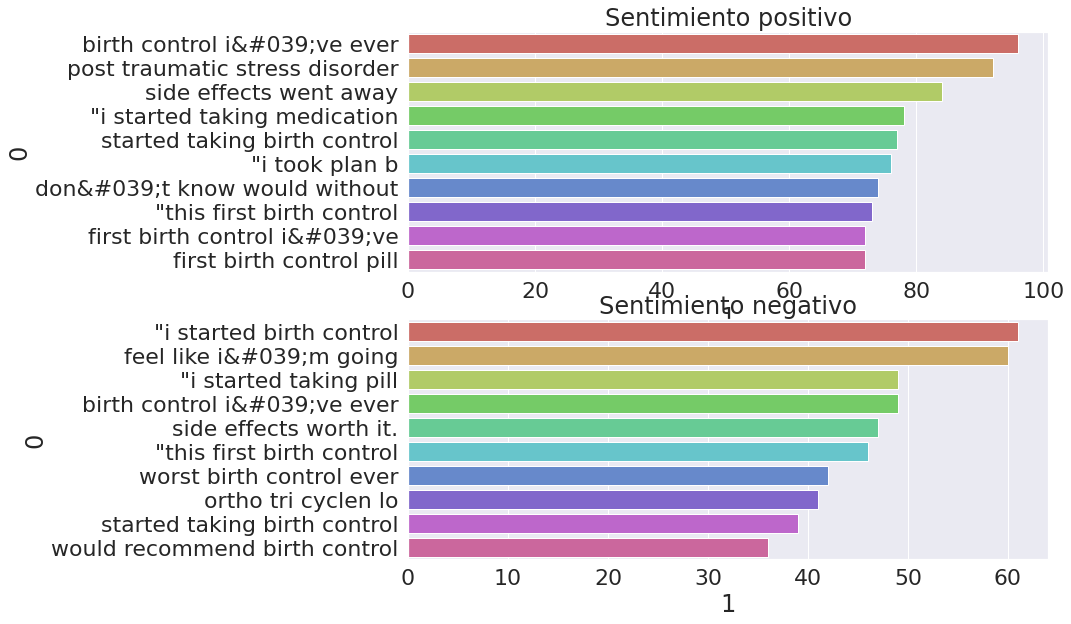

In [ ]:
plot_ngrams(4) #cuatrigramas

##Longitud de los reviews

In [ ]:
#funcion para calcular la longitud
def longitud(review):
  return len(review)

In [ ]:
#calculo de la longitud de cada review
trainset['longitud'] = trainset['review'].apply(longitud)

In [ ]:
#Observa los cambios en el dataset, se agrego la columna logitud
trainset.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,longitud
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Positivo,79
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Positivo,741
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Negativo,755
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positivo,448
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Positivo,719


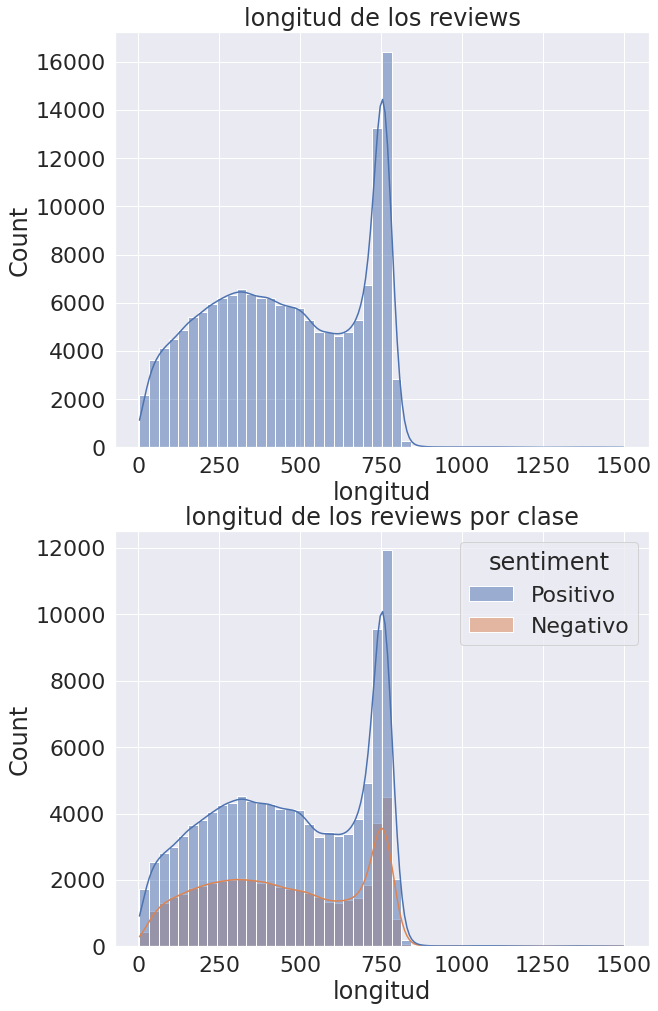

In [ ]:
plt.figure(figsize=(20,26))
sns.set(font_scale = 2, style = 'darkgrid')
ax= [None for _ in range(2)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan = 2)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan = 2)

sns.histplot(data= trainset.loc[trainset['longitud'] < 1500], x = "longitud", alpha = 0.5 , binwidth = 30,kde = True, ax=ax[0])
sns.histplot(data= trainset.loc[trainset['longitud'] < 1500], x = "longitud", alpha = 0.5 , binwidth = 30,kde = True, hue = 'sentiment',ax=ax[1])

ax[0].set_title('longitud de los reviews')
ax[1].set_title('longitud de los reviews por clase')

plt.show()

In [ ]:
trainset.longitud.quantile(q = 0.9)

758.0

##Rating

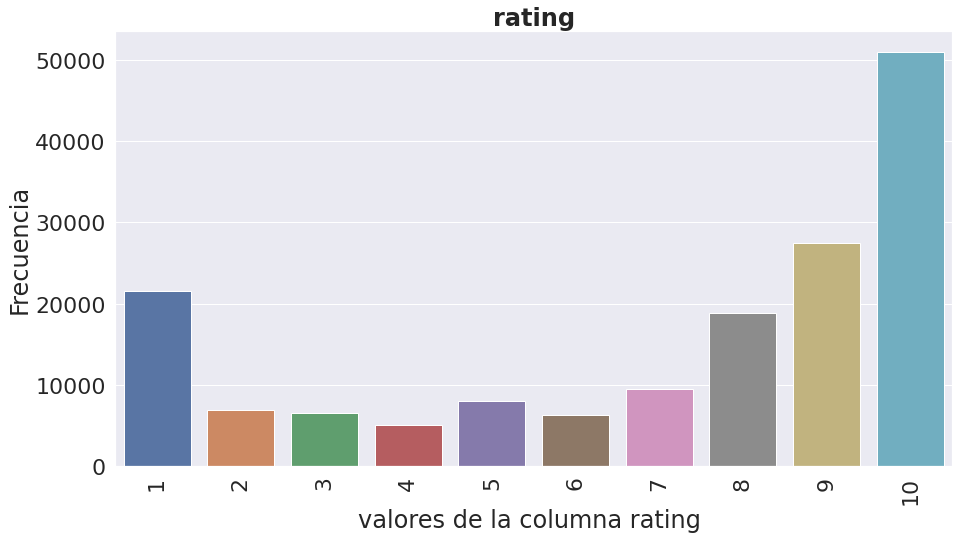

In [ ]:
barplot(trainset, 'rating', 10, 'rating')

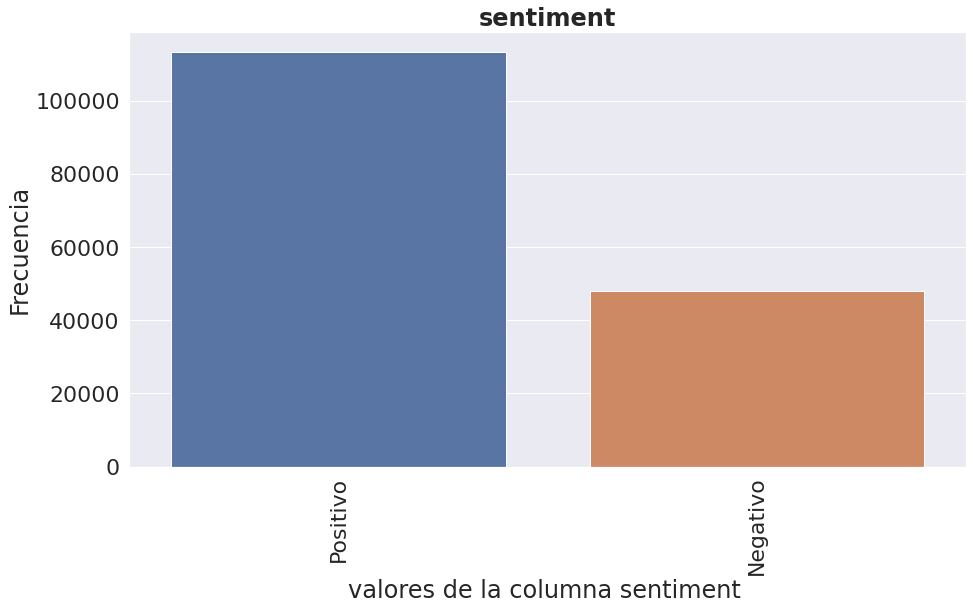

In [ ]:
barplot(trainset, 'sentiment',2, 'sentiment')

In [ ]:
trainset.sentiment.value_counts()

Positivo    113209
Negativo     48088
Name: sentiment, dtype: int64

##Missing data

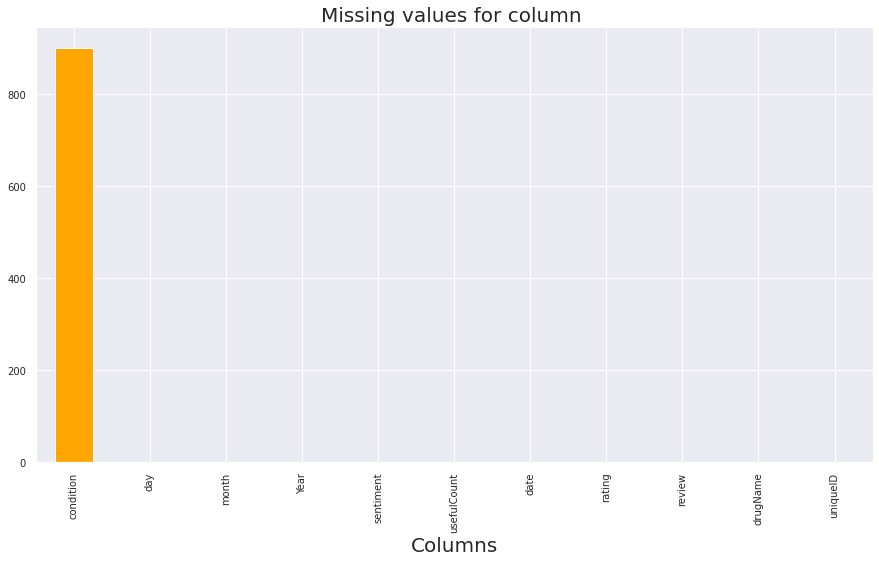

In [ ]:
percent = (trainset.isnull().sum()).sort_values(ascending=False)#contando el número de elementos nulos por columna
percent.plot(kind="bar", figsize = (15,8), fontsize = 10, color='orange') 
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Missing values for column ", fontsize = 20)
plt.show()